In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.optimizers import Adam,Adadelta
from sklearn.model_selection import train_test_split

In [ ]:
DATASET_PATH =  "C:\\Users\\ASLAM\\\Desktop\\Bootcamp\\Day9\\PetImages\\"
CATEGORIES = ["Cat", "Dog"]

def preprocess_image(img):
    img = cv2.equalizeHist(img)  
    img = cv2.GaussianBlur(img, (3,3), 0)  
    return img / 255.0

def load_images_and_labels(dataset_path, img_size=(31,31)):
    images = []
    labels = []
    for label, category in enumerate(CATEGORIES):
        category_path = os.path.join(dataset_path, category)
        for filename in os.listdir(category_path)[:500]: 
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  
            img = preprocess_image(img)  
            img = cv2.resize(img, img_size)  
            images.append(img)
            labels.append(label)
    
    return np.array(images).reshape(-1, 31,31 ,1), np.array(labels)

X, y = load_images_and_labels(DATASET_PATH)

y = tf.keras.utils.to_categorical(y, num_classes=2)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), activation="relu", input_shape=(31,31,1), padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(2, activation="softmax")
])



In [32]:

model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,  
    horizontal_flip=True
)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)




In [34]:

history = model.fit(train_generator, epochs=5, validation_data=val_generator)



Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5098 - loss: 0.6979 - val_accuracy: 0.5650 - val_loss: 0.6902
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5306 - loss: 0.6882 - val_accuracy: 0.5700 - val_loss: 0.6842
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5968 - loss: 0.6804 - val_accuracy: 0.5800 - val_loss: 0.6762
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5782 - loss: 0.6796 - val_accuracy: 0.5600 - val_loss: 0.6719
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6111 - loss: 0.6701 - val_accuracy: 0.5750 - val_loss: 0.6657


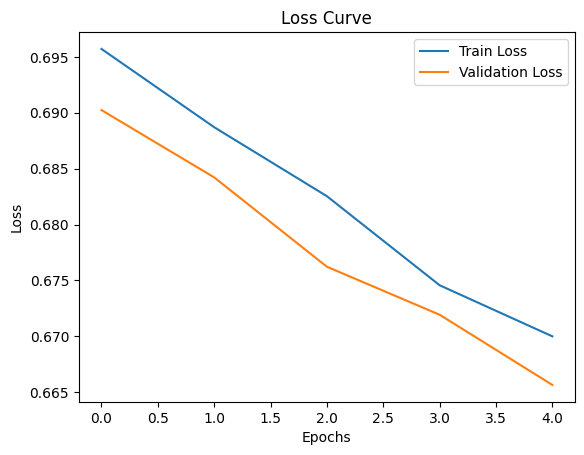

In [35]:

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()



In [36]:

train_acc = history.history["accuracy"][-1] * 100
val_acc = history.history["val_accuracy"][-1] * 100
print(f"Final Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Accuracy: {val_acc:.2f}%")

Final Training Accuracy: 60.93%
Final Validation Accuracy: 57.50%
